<a href="https://colab.research.google.com/github/edwardoughton/GeoAI/blob/main/02_01_ggs590_geoai_problem_formulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem formulation

This week we will cover:
* Problem formulation (e.g., conceptual framing in GeoAI)
* A recap on working with spatial data and associated tooling (e.g., GeoPandas)


The learning objectives include:

* Loading and inspecting geospatial vector data using GeoPandas, including management of geometry types and associated attributes, as well as dealing with Coordinate Reference Systems (CRS)
* Translating geographic research questions into testable spatial hypotheses
* Operationalizing a spatial hypothesis as a computable workflow (considering data layers, spatial operations, quantitative outputs, exporting result for visualization etc.)
* Implementing simple hypothesis-driven spatial analyses using scripting, linking each code step directly to a component of the research question
* Recognizing that many aspects of a GeoAI workflow require human judgment rather than AI-assisted coding
* Document a GeoAI-ready problem specification, including assumptions and constraints/attributes (e.g., CRS, spatial extent etc.)

## Getting started

You all need to be able to run the cell below, as today we will be utilizing `geopandas`, `pandas`, `numpy`, and `matplotlib`.

To summarize:
* `GeoPandas` – Extends pandas to work with geospatial data (points, lines, polygons) and enables spatial operations, from intersections to buffering. Also helps to readily handle CRS data.
* `Pandas` – A workhorse package for Python data science as it provides data structures (e.g., DataFrames), along with functions for swift data management of tabular data. Can be efficient, as it largely uses `NumPy` vectorization (e.g., more memory efficient than using for loops) which compiles code in low-level C (rather than Python).
* `NumPy` – Supplies fast numerical arrays and mathematical functions used for vectorized computations. This package is the backbone of pandas and many scientific libraries. When you call a common function, pre-compiled C routines are used, avoiding Python overhead.
* `Matplotlib` – A plotting library for creating scientific visualizations, from bar charts to line plots.


In [94]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and inspecting country boundaries

Today we will work with Natural Earth data. Being able to access data via a URL is pretty handy, as it is readily available.


In [ ]:
# Load Natural Earth data and print dataframe head
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# print the top three rows (e.g., the head of the dataframe)
world.head(n=3)

In [ ]:
# Inspecting all columns
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
print(f"This will be {len(list(world.columns))} items long!")
print(" ")
list(world.columns)

In [ ]:
# Get dataframe attributes (shape, crs, geometry type)
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
print("Rows, cols:", world.shape)
print("CRS:", world.crs)
print("Geometry types:", world.geom_type.value_counts().to_dict())


In [ ]:
# Plot dataframe geometry information
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
fig, ax = plt.subplots(figsize=(12, 6)) #define matplotlib fig and ax objects
world.plot(ax=ax, edgecolor="black") #plot data
ax.set_title(f"World Countries (Natural Earth) ({world.crs})") #specify title
plt.savefig("world_centroids_map.png", dpi=300, bbox_inches="tight") #export
plt.show()

## Exercise

* Can you suitably describe the data now, based on the attributes we explored? Please provide your description using quantitative information we obtained from the dataframe.
* Name 3 useful columns we could use in our analysis.
* What units is our CRS in?

##Additional global datasets

Before we progress, it is important to highlight we have a range of datasets we could readily begin working with.

These could be great for thinking about what to do in your class assignment.

In [96]:
# Natural Earth – Rivers (LineStrings)
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip"
data = gpd.read_file(url)
data.head(3)

,scalerank,featurecla,name,name_alt,min_zoom,name_en,min_label,wikidataid,label,name_ar,...,name_tr,name_vi,name_zh,ne_id,name_he,name_uk,name_ur,name_fa,name_zht,geometry
0,2,River,Brahmaputra,None,2.1,Brahmaputra,3.1,Q45403,Brahmaputra,نهر براهمابوترا,...,Brahmaputra,Brahmaputra,布拉马普特拉河,1159120261,בראהמאפוטרה,Брахмапутра,دریائے برہم پتر,رود براهماپوترا,布拉马普特拉河,"LINESTRING (82.40048 30.41148, 82.72273 30.365..."
1,2,River,Mekong,None,2.1,Mekong,3.1,Q41179,Mekong,نهر ميكونغ,...,Mekong,Mê Kông,湄公河,1159121023,מקונג,Меконг,دریائے میکانگ,مکونگ,湄公河,"LINESTRING (94.084 33.15586, 94.4477 33.1633, ..."
2,2,River,Ob,None,2.1,Ob,3.1,Q973,Ob,أوبي,...,Obi,Obi,鄂畢河,1159114911,אוב,Об,اوب,رود اب,鄂畢河,"LINESTRING (90.32537 47.65017, 90.20052 47.408..."


In [97]:
# Natural Earth – Cities (Points)
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_populated_places.zip"
data = gpd.read_file(url)
data.head(3)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.9361)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,...,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)


In [98]:
# US States
import geopandas as gpd
url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_state_20m.zip"
data = gpd.read_file(url)
data.head(3)

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676686238592,18982083586,"POLYGON ((-106.62344 31.91403, -106.63011 31.9..."
1,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-118.59397 33.4672, -118.48478..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."


In [99]:
# US Counties
import geopandas as gpd
url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_county_20m.zip"
data = gpd.read_file(url)
data.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,027,00345518,0500000US13027,13027,Brooks,Brooks County,GA,Georgia,06,1277341276,11955761,"POLYGON ((-83.73616 31.03768, -83.57396 31.033..."
1,31,095,00835869,0500000US31095,31095,Jefferson,Jefferson County,NE,Nebraska,06,1476765697,14202851,"POLYGON ((-97.36869 40.35039, -96.91606 40.349..."
2,51,683,01498430,0500000US51683,51683,Manassas,Manassas city,VA,Virginia,25,25493247,146287,"POLYGON ((-77.52666 38.7332, -77.49545 38.7706..."


In [102]:
# Airports
import pandas as pd
import geopandas as gpd

url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
cols = ["id","name","city","country","iata","icao","lat","lon","alt","tz","dst","tz_db","type","source"]
df = pd.read_csv(url, header=None, names=cols)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf.head(3)

,id,name,city,country,iata,icao,lat,lon,alt,tz,dst,tz_db,type,source,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (144.29601 -5.82679)


## Create points and lines from polygons

Before we progress to Coordinate Reference Systems (CRS), we will explore some spatial operations by converting our polygons into other spatial datatypes.

Remember:
* Points represent single locations in space using one coordinate pair (x, y), such as Points of Interest (POIs), cities etc.
  * e.g., (2.34, 3.67)
* LineStrings represent linear features made of ordered points connected in sequence, such as roads or flight paths.
  * e.g., [(2.34, 3.67), (3.98, 4.56)]
* Polygons represent enclosed areas defined by closed LineStrings, such as country boundaries or land parcels.
  * e.g., [(2.34, 3.67), (3.98, 4.56), (5.34, 4.98), (6.12, 5.35), (2.34, 3.67)]

Note: the error `geopandas` prints to the console provides you an important hint for our next topic on CRS!

/tmp/ipython-input-958822754.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids["geometry"] = world.geometry.centroid


                       country CONTINENT                     geometry
0                         Fiji   Oceania  POINT (163.85316 -17.31631)
1  United Republic of Tanzania    Africa    POINT (34.75299 -6.25773)
2               Western Sahara    Africa   POINT (-12.13783 24.29117)


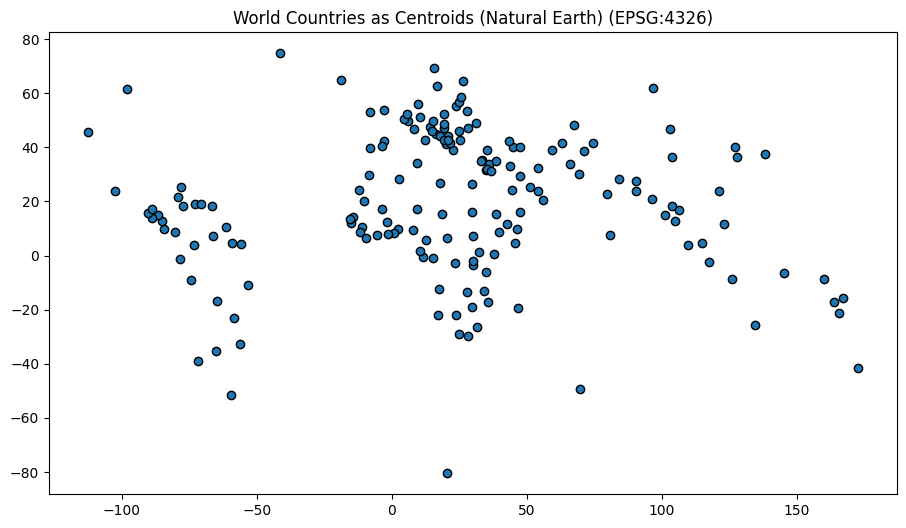

In [117]:
# Convert polygons to points
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
print(centroids.head(3))

#plot the data using matplotlib .plot() function
fig, ax = plt.subplots(figsize=(12, 6))
centroids.plot(ax=ax, edgecolor="black")
ax.set_title(f"World Countries as Centroids (Natural Earth) ({centroids.crs})")
plt.show()


                       country CONTINENT  \
0                         Fiji   Oceania   
1  United Republic of Tanzania    Africa   
2               Western Sahara    Africa   

                                            geometry  
0  MULTILINESTRING ((180 -16.06713, 180 -16.55522...  
1  LINESTRING (33.90371 -0.95, 34.07262 -1.05982,...  
2  LINESTRING (-8.66559 27.65643, -8.66512 27.589...  


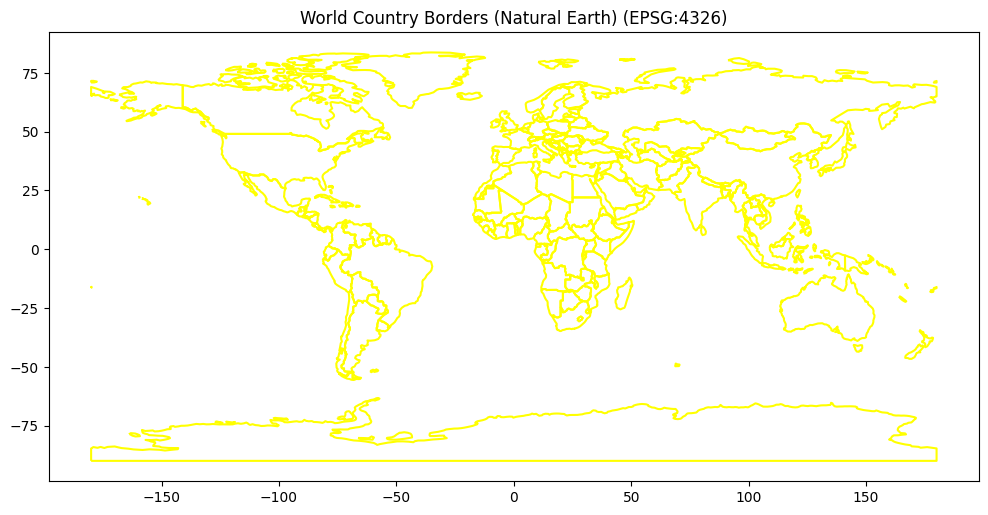

In [118]:
# Convert polygons to linestrings
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
print(borders.head(3))

fig, ax = plt.subplots(figsize=(12, 6))
borders.plot(ax=ax, edgecolor="yellow")
ax.set_title(f"World Country Borders (Natural Earth) ({centroids.crs})")
plt.show()

/tmp/ipython-input-272656534.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids["geometry"] = world.geometry.centroid


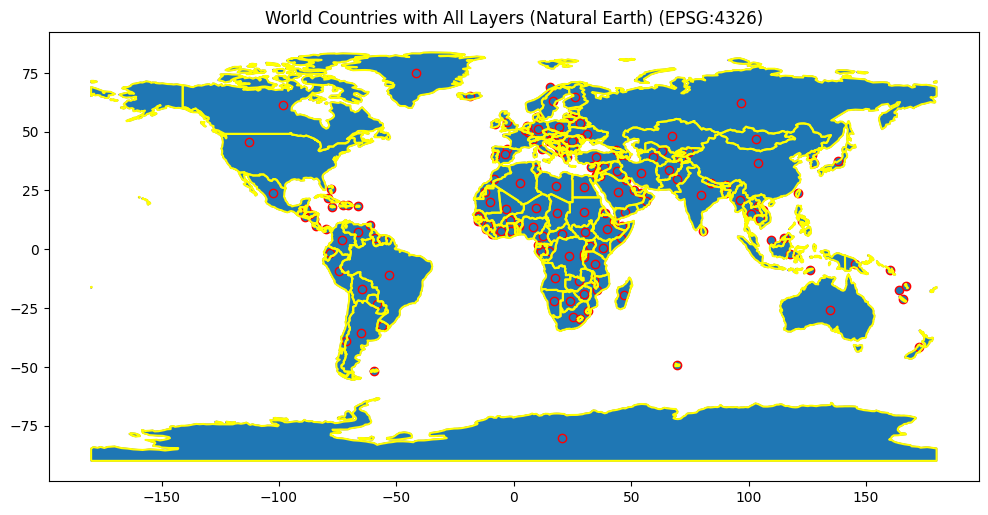

In [122]:
# Plot all layers
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="blue")
centroids.plot(ax=ax, edgecolor="red")
borders.plot(ax=ax, edgecolor="yellow")
ax.set_title(f"World Countries with All Layers (Natural Earth) ({borders.crs})")
plt.show()


# Exercise

* Why might centroids be a bad spatial format for some countries?
* Where does human judgment come in?

# Managing Coordinate Reference Systems (CRS)

A CRS is a framework that defines how locations on the Earth are represented numerically using coordinates.

There are three important parts of a CRS:
* Origin and orientation – where the coordinate system is anchored (e.g., Earth’s center or some local map projection origin) and how axes are defined (latitude/longitude vs. x/y on a plane).
* Units of measurement – whether coordinates are in degrees (e.g., latitude/longitude) or in linear units like meters or feet.
* Map projection and datum – the mathematical model that transforms the Earth’s curved surface into a flat map (projection) and the reference shape of the Earth used (datum, e.g., WGS84).

Example:
* WGS84 (EPSG:4326) uses latitude and longitude in degrees (used by GPS).
* UTM (e.g., EPSG:32147) uses meters in a projected coordinate
system for accurate distance and area calculations.

Note: Here, EPSG:3857 is used for convenience, but it is not an equal-distance projection. This means results at high latitudes will be distorted. When you only want to consider a small area, rather than the whole globe, there are better CRS to choose.


In [123]:
# Check CRS
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
print(world.crs)

EPSG:4326


In [124]:
# Convert CRS
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
#Convert to projected CRS
world = world.to_crs(3857)
print(world.crs)

EPSG:3857


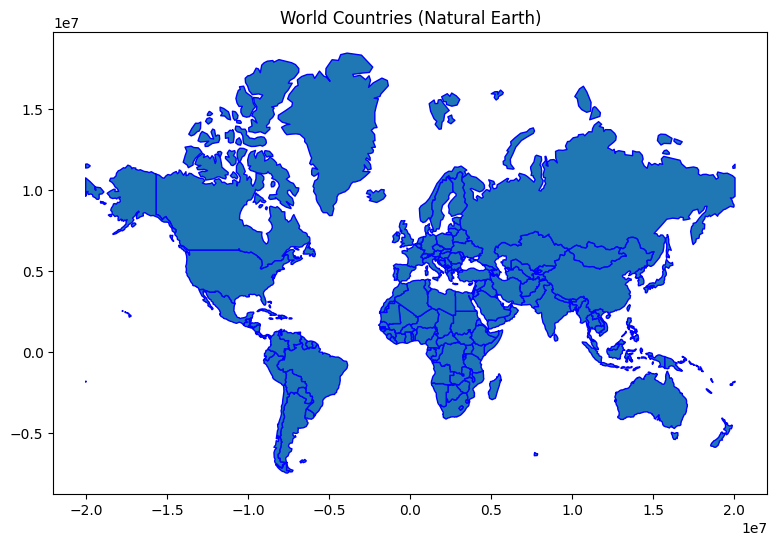

In [125]:
# Visual check
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
#Convert to projected CRS
world = world.to_crs(3857)
#Drop Antarctica
world = world[world["NAME"] != "Antarctica"]
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="blue")
ax.set_title("World Countries (Natural Earth)")
plt.show()

## Exercise

* Set the crs to 4326 and try buffering using the `.buffer()` function, and define a logical buffer value in the parentheses. What issues do you encounter?
* Now switch to the CRS to EPSG:3857.
* Retry the buffer and map.
* Explain why degrees might be inappropriate for buffering.

## Converting research questions to testable hypotheses

We can use a simple geography-driven question to practice formulation:

* "Are national centroids more likely to occur inside their country borders?"

An example of a testable hypothesis could be:

* "More than 50% of country centroids lie within 200 km of their country border"



## Exercise

Have a go at formulating:
* A research question and hypothesis which uses country polygons, centroids and borders.
* A hypothesis with a distance threshold (100 km, 200 km etc.), a quantitative claim (a percentage, mean distance, counts etc.).
* Explain how the hypothesis can be falsified.

Feel free to introduce some of the interesting datasets we quickly covered above!

## Operationalizing a hypothesis into a GIS workflow

Our goal to achieve this is to specify:
* Inputs (points/lines/polygons + required attributes)
* Spatial extent (polygon boundary)
* CRS
* Spatial operations (buffer, spatial join, intersect, clip, summarize, etc.)
* Outputs (counts, rates, table, map, exported file)
* Assumptions/constraints (data completeness, positional accuracy, scale)
* Validation checks (sanity checks you will run)


## Exercise

Fill out the workflow template above for your chosen hypothesis.


## Implementing a hypothesis-driven analysis

E.g., "is a centroid within 200 km of a border".

* Set a distance threshold (using meters in EPSG:3857 units)
* Buffer borders
* Undertake a spatial join (e.g., to find which centroids fall within the buffer)
* Compute share of centroids in buffer
* Plot

The below code should not be new to you, as we already covered these processes above (e.g., generates polygons, linestring borders, and centroid points):

In [126]:
# Implement a hypothesis driven analysis
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world[world["NAME"] != "Antarctica"]
world = world.to_crs(3857) #Convert to projected CRS
centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

Next, we will specify our border distance (`DIST_KM`), just be aware we need to convert it to meters to match our CRS (`DIST_M`).

We can then buffer our borders, based on this distance (which will convert them from a linestring to polygons).


In [127]:
# Implement a hypothesis driven analysis
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world[world["NAME"] != "Antarctica"]
world = world.to_crs(3857) #Convert to projected CRS
centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

DIST_KM = 200
DIST_M = DIST_KM * 1000

border_buffer = borders.copy()
border_buffer["geometry"] = border_buffer.geometry.buffer(DIST_M)
border_buffer.head(3)

,country,CONTINENT,geometry
0,Fiji,Oceania,"MULTIPOLYGON (((19709046.002 -1777716.331, 197..."
1,United Republic of Tanzania,Africa,"POLYGON ((3196402.988 -314244.499, 3193998.451..."
2,Western Sahara,Africa,"POLYGON ((-1780164.314 2231505.326, -1782517.6..."


Next, we can carry out a spatial join (`gpd.sjoin()`) between the border polygons, and any centroids that fall within it.

In [128]:
# Implement a hypothesis driven analysis
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world[world["NAME"] != "Antarctica"]
world = world.to_crs(3857) #Convert to projected CRS
centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

DIST_KM = 200
DIST_M = DIST_KM * 1000

border_buffer = borders.copy()
border_buffer["geometry"] = border_buffer.geometry.buffer(DIST_M)

centroids_in = gpd.sjoin(centroids, border_buffer[["geometry"]], predicate="within", how="inner")
centroids["within_buffer"] = centroids.index.isin(centroids_in.index)
centroids["within_buffer"].value_counts()

#now count true for in the buffer, and false for not in the buffer
counts = centroids["within_buffer"].value_counts()
print(f"true_count: {counts.get(True, 0)}")
print(f"false_count: {counts.get(False, 0)}")
print(f"Share of centroids within {DIST_KM} km of a border: {counts.get(True, 0)/len(centroids):.3f}")

true_count: 123
false_count: 53
Share of centroids within 200 km of a border: 0.699


Now plot:

Share of centroids within 200 km of a border: 0.699


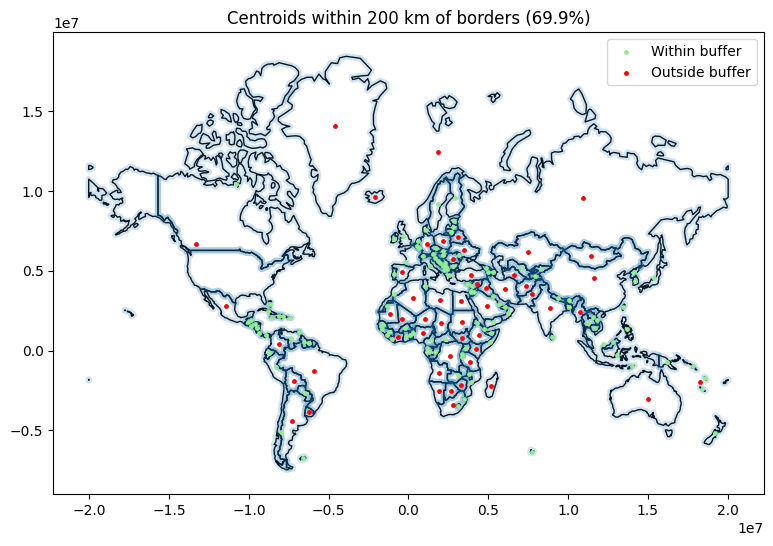

In [129]:
# Implement a hypothesis driven analysis
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world[world["NAME"] != "Antarctica"]
world = world.to_crs(3857) #Convert to projected CRS
centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

DIST_KM = 200
DIST_M = DIST_KM * 1000

border_buffer = borders.copy()
border_buffer["geometry"] = border_buffer.geometry.buffer(DIST_M)

centroids_in = gpd.sjoin(centroids, border_buffer[["geometry"]], predicate="within", how="inner")
centroids["within_buffer"] = centroids.index.isin(centroids_in.index)
centroids["within_buffer"].value_counts()
share = centroids["within_buffer"].mean()
print(f"Share of centroids within {DIST_KM} km of a border: {share:.3f}")

fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, edgecolor="black", facecolor="none")
border_buffer.plot(ax=ax, alpha=0.2)
centroids[centroids["within_buffer"]].plot(ax=ax, markersize=6,
                                           color="lightgreen", label="Within buffer")
centroids[~centroids["within_buffer"]].plot(ax=ax, markersize=6,
                                            color="red", label="Outside buffer")
ax.set_title(f"Centroids within {DIST_KM} km of borders ({share*100:.1f}%)")
ax.legend()
plt.show()

## Exercise

* Experiment with the threshold value - which seems most informative?
* Where does human judgment enter? (scale, proxy choice, interpretation, visualization scheme, etc.)

## Exporting data

You need to be able to quickly export your results. Here we will cover how to do that.  


In [ ]:
# Implement a hypothesis driven analysis
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world[world["NAME"] != "Antarctica"]
world = world.to_crs(3857) #Convert to projected CRS
centroids = world.copy()
centroids["geometry"] = world.geometry.centroid
centroids = centroids[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})
borders = world.copy()
borders["geometry"] = world.geometry.boundary
borders = borders[["ADMIN", "CONTINENT", "geometry"]].rename(columns={"ADMIN":"country"})

DIST_KM = 200
DIST_M = DIST_KM * 1000

border_buffer = borders.copy()
border_buffer["geometry"] = border_buffer.geometry.buffer(DIST_M)

centroids_in = gpd.sjoin(centroids, border_buffer[["geometry"]], predicate="within", how="inner")
centroids["within_buffer"] = centroids.index.isin(centroids_in.index)
centroids["within_buffer"].value_counts()
share = centroids["within_buffer"].mean()

#select desired columns
centroids_out = centroids[["country", "CONTINENT", "within_buffer", "geometry"]]

#export as geojson
centroids_out.to_file("centroids_within_buffer.geojson", driver="GeoJSON")

#export as geopackage
centroids_out.to_file("centroids_within_buffer.gpkg", driver="GPKG")

#export as shapefile
# centroids_out.to_file("centroids_within_buffer.shp", driver="ESRI Shapefile")

print("Export complete")

## Exercise
* What would you check in QGIS to confirm the result is plausible?
* What “sanity check” would you add before trusting this?

## Human judgment vs AI-assisted coding

* What parts were judgment (not code)?
* What would an AI tool be good at here?
* What would an AI tool be *dangerous* at here?

## Exercise

Write 4 bullets:

* 2 judgment calls you made in your example
* 1 assumption you are uncomfortable with
* 1 improvement you would make to this exercise

##Recap

This notebook has introduced students to:

* Loading `GeoPandas` data from a URL
* Inspecting geospatial data attributes and geometry
* Mapping and exporting geospatial data
* Working with CRS and projections
* Formulating research questions, hypotheses, and then GIS workflows
* Introductory spatial operations (buffer, sjoin etc.)
* Exporting geospatial results
* Refined your understanding of human judgment vs AI-generated code

And then the learning objectives you have accomplished include:

* Loading and inspecting geospatial vector data using GeoPandas, including management of geometry types and associated attributes, as well as dealing with Coordinate Reference Systems (CRS)
* Translating geographic research questions into testable spatial hypotheses
* Operationalizing a spatial hypothesis as a computable workflow (considering data layers, spatial operations, quantitative outputs, exporting result for visualization etc.)
* Implementing simple hypothesis-driven spatial analyses using scripting, linking each code step directly to a component of the research question
* Recognizing that many aspects of a GeoAI workflow **require human judgment** rather than AI-assisted coding.
* Document a GeoAI-ready problem specification, including assumptions and constraints/attributes (e.g., CRS, spatial extent etc.)